In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import random
import numpy as np
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader

In [114]:
# Ustawienie wyświetlania obrazków w skali szarości
plt.rcParams['image.cmap'] = 'gray'

# Ustawienie rozmiaru obrazka i DPI
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 80

class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

100%|██████████| 9912422/9912422 [00:00<00:00, 109970616.58it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30690573.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29564693.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15744238.65it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 18598628.46it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301953.47it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5548627.15it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11890020.37it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



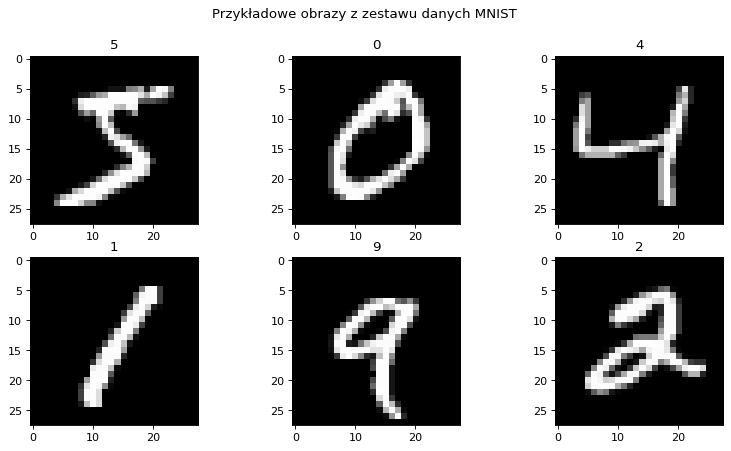

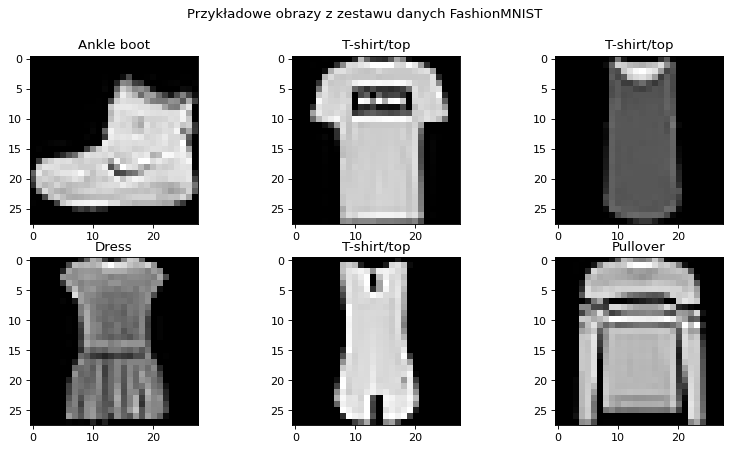

In [3]:
# Pobranie zbioru danych MNIST
mnist_data = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
# Pobranie zbioru danych FashionMNIST
fashion_data = datasets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

# Pobranie testowego zbioru danych MNIST
mnist_data_test = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
# Pobranie testowego zbioru danych FashionMNIST
fashion_data_test = datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

# Wyświetlenie przykładowych obrazów z MNIST
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    image, label = mnist_data[i]
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.title(f"{label}")
plt.suptitle("Przykładowe obrazy z zestawu danych MNIST")
plt.show()

# Wyświetlenie przykładowych obrazów z FashionMNIST
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    image, label = fashion_data[i]
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.title(f"{class_labels[label]}")
plt.suptitle("Przykładowe obrazy z zestawu danych FashionMNIST")
plt.show()

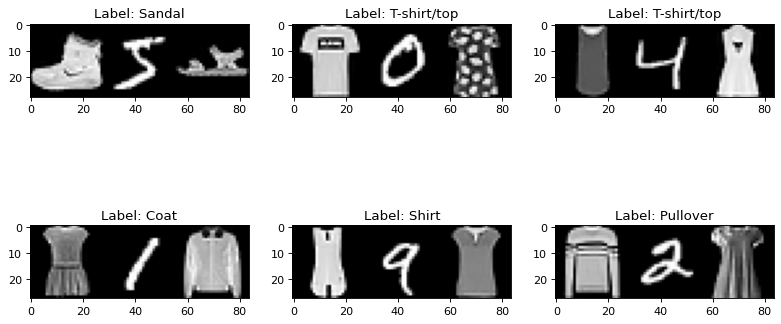

In [117]:
# Przygotowanie funkcji do sklejania obrazów
def combine_images(left_images, left_labels, center_images, center_labels, right_images, right_labels):
    matching_indices = np.where(left_labels == right_labels)[0]
    left_images = torch.from_numpy(np.delete(left_images.numpy(), matching_indices, axis=0))
    left_labels = torch.from_numpy(np.delete(left_labels.numpy(), matching_indices, axis=0))
    center_images = torch.from_numpy(np.delete(center_images.numpy(), matching_indices, axis=0))
    center_labels = torch.from_numpy(np.delete(center_labels.numpy(), matching_indices, axis=0))
    right_images = torch.from_numpy(np.delete(right_images.numpy(), matching_indices, axis=0))
    right_labels = torch.from_numpy(np.delete(right_labels.numpy(), matching_indices, axis=0))

    combined = torch.cat((left_images, center_images, right_images), dim=2)

    is_even = (center_labels % 2 == 0).long()
    result_labels = torch.from_numpy(np.where(is_even == 1, left_labels, right_labels))

    return combined, result_labels

# Przygotowanie tensorów z obrazami i etykietami
mnist_images = mnist_data.data
mnist_labels = mnist_data.targets

fashion_images_left = fashion_data.data
fashion_labels_left = fashion_data.targets

shuffled_indices = np.random.permutation(len(fashion_data))
fashion_images_right = fashion_data.data[shuffled_indices]
fashion_labels_right = fashion_data.targets[shuffled_indices]

# Połączenie obrazów i wygenerowanie etykiet
combined_images, combined_labels = combine_images(fashion_images_left, fashion_labels_left, mnist_images, mnist_labels, fashion_images_right, fashion_labels_right)

# Przygotowanie tensorów z obrazami i etykietami dla testów
mnist_images_test = mnist_data_test.data
mnist_labels_test = mnist_data_test.targets

fashion_images_left_test = fashion_data_test.data
fashion_labels_left_test = fashion_data_test.targets

shuffled_indices_test = np.random.permutation(len(fashion_data_test))
fashion_images_right_test = fashion_data_test.data[shuffled_indices_test]
fashion_labels_right_test = fashion_data_test.targets[shuffled_indices_test]

# Połączenie obrazów i wygenerowanie etykiet dla testów
combined_images_test, combined_labels_test = combine_images(fashion_images_left_test, fashion_labels_left_test, mnist_images_test, mnist_labels_test, fashion_images_right_test, fashion_labels_right_test)



# Wyświetlenie przykładowych obrazów z połączonego zestawu danych
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    image, label = combined_images[i], combined_labels[i]
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.title(f"Label: {class_labels[label.item()]}")
plt.show()

In [39]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomCNN, self).__init__()

        # Warstwy konwolucyjne z aktywacją ReLU i warstwami Max Pooling
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        # Warstwa spłaszczająca (Flatten)
        self.flatten = nn.Flatten()

        # Warstwa Dropout
        self.dropout = nn.Dropout(0.45)

        # Warstwy gęste z aktywacją ReLU
        self.dense1 = nn.Linear(512, 32)
        self.relu4 = nn.ReLU()

        # Warstwa gęsta z aktywacją Softmax na wyjściu
        self.dense2 = nn.Linear(32, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)

        x = self.flatten(x)
        x = self.dropout(x)

        x = self.dense1(x)
        x = self.relu4(x)

        x = self.dense2(x)
        x = self.softmax(x)

        return x

# Inicjalizacja modelu
model = CustomCNN()

# Wyświetlenie architektury modelu
print(model)

CustomCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.45, inplace=False)
  (dense1): Linear(in_features=512, out_features=32, bias=True)
  (relu4): ReLU()
  (dense2): Linear(in_features=32, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [40]:
# Hiperparametry
learning_rate = 0.0005
batch_size = 128
num_epochs = 20

# Przygotowanie danych
dataset = torch.utils.data.TensorDataset(combined_images.float(), combined_labels)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Inicjalizacja modelu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Definicja funkcji kosztu i optymalizatora
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.unsqueeze(1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

print('Finished Training')

Epoch 1/20, Loss: 2.1668237229707406
Epoch 2/20, Loss: 2.057143443553861
Epoch 3/20, Loss: 1.9729575258535896
Epoch 4/20, Loss: 1.842562906815717
Epoch 5/20, Loss: 1.7928149804933053
Epoch 6/20, Loss: 1.7661498700071683
Epoch 7/20, Loss: 1.7522847338130525
Epoch 8/20, Loss: 1.7441362063278778
Epoch 9/20, Loss: 1.7342750556112185
Epoch 10/20, Loss: 1.7296428986229977
Epoch 11/20, Loss: 1.7283791187540085
Epoch 12/20, Loss: 1.7212338470223398
Epoch 13/20, Loss: 1.7144260921840713
Epoch 14/20, Loss: 1.6990760295804492
Epoch 15/20, Loss: 1.6736171959131745
Epoch 16/20, Loss: 1.6705964701758993
Epoch 17/20, Loss: 1.6660889758067006
Epoch 18/20, Loss: 1.664773922351647
Epoch 19/20, Loss: 1.660089928860336
Epoch 20/20, Loss: 1.658060463194043
Finished Training


In [42]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model and optimizer to Google Drive
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, '/content/drive/My Drive/model2_and_optimizer.pth')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
from google.colab import files

model = CustomCNN()

checkpoint = torch.load('/content/drive/My Drive/model2_and_optimizer.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

CustomCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.4, inplace=False)
  (dense1): Linear(in_features=512, out_features=32, bias=True)
  (relu4): ReLU()
  (dense2): Linear(in_features=32, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [98]:
# Define a data loader for your validation or test dataset
dataset = torch.utils.data.TensorDataset(combined_images_test.float(), combined_labels_test)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)

# Initialize variables to keep track of accuracy
correct = 0
total = 0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
pred = []

# Iterate through the dataset and calculate accuracy
with torch.no_grad():
    model.eval()
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        images = images.unsqueeze(1)
        outputs = model(images)
        pred.append((images, labels, torch.max(outputs, 1)[1]))
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')

Accuracy on the test dataset: 82.07%


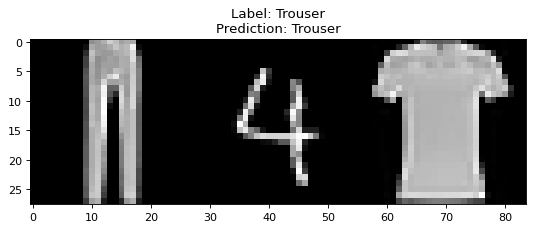

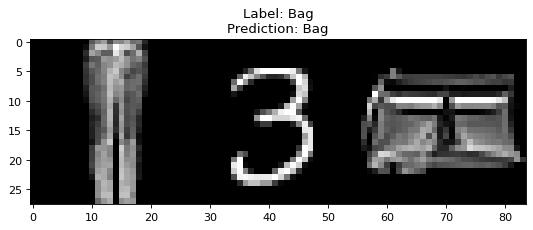

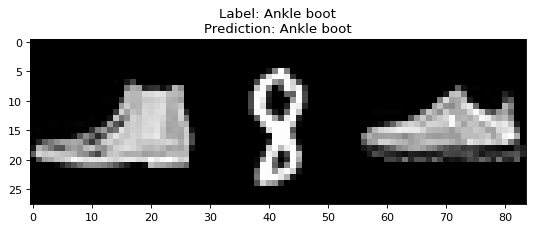

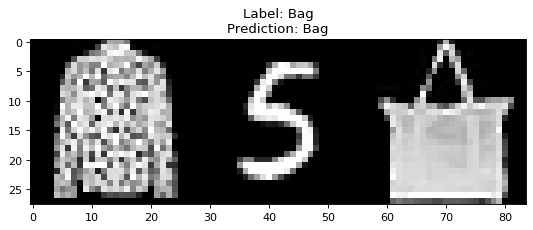

In [116]:
# Function to show images and model predictions
def show_predictions(images, labels, predicted_labels):

    for i in range(len(images)):
        # plt.subplot(1, 4, i + 1)
        label_index = labels[i].item()  # Convert tensor to integer
        predicted_index = predicted_labels[i].item()
        plt.title(f'Label: {class_labels[label_index]}\nPrediction: {class_labels[predicted_index]}')
        img = images[i].cpu().numpy()
        img = img.reshape(28, 84)
        plt.imshow(img)
        plt.show()

images = [pred[0][0][23], pred[2][0][53], pred[7][0][12], pred[23][0][61]]
labels = [pred[0][1][23], pred[2][1][53], pred[7][1][12], pred[23][1][61]]
predicted = [pred[0][2][23], pred[2][2][53], pred[7][2][12], pred[23][2][61]]

show_predictions(images, labels, predicted)
